<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/sinarmas_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

# Pembacaan dataset

In [2]:
train = pd.read_csv('train (1).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print('Training set shape: ', train.shape)
print('Test set shape: ', test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Di atas adalah data jumlah baris non null dan tipe dari kolom dataset train dan test

In [6]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Visualisasi

Berikut adalah persebaran jumlah parameter dari setiap kolom pada dataset train

In [10]:
df_num = train[['Age','Fare']]
df_cat = train[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

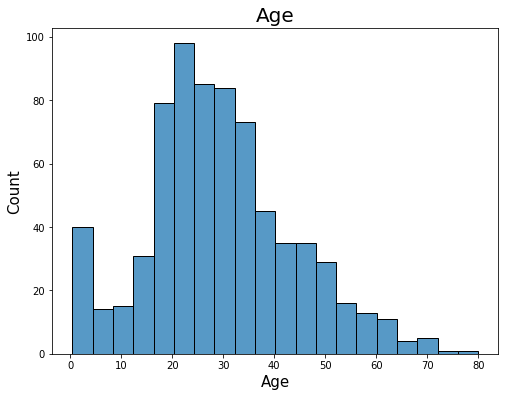

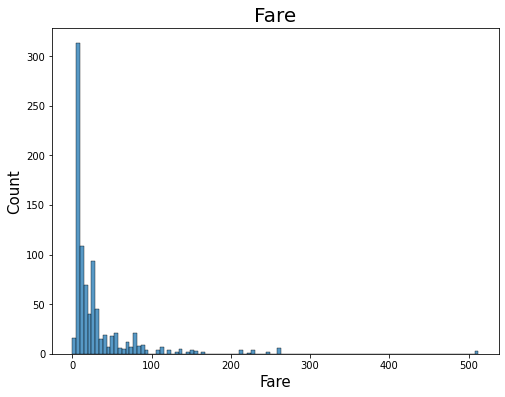

In [11]:
for i in df_num.columns:
    plt.figure(figsize = (8,6))
    sns.histplot(df_num[i])
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


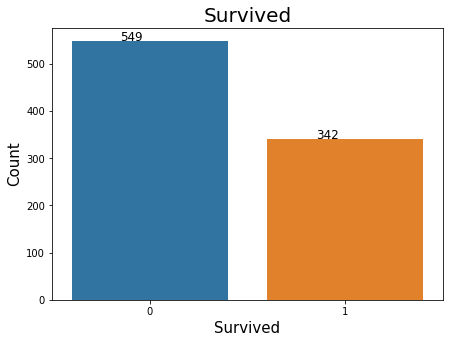

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


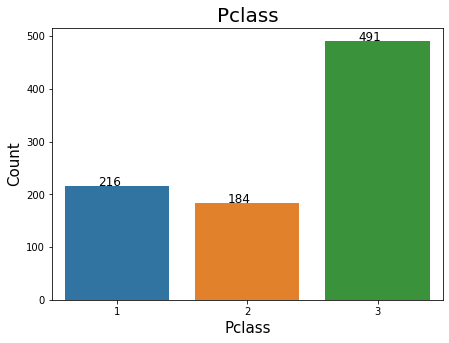

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


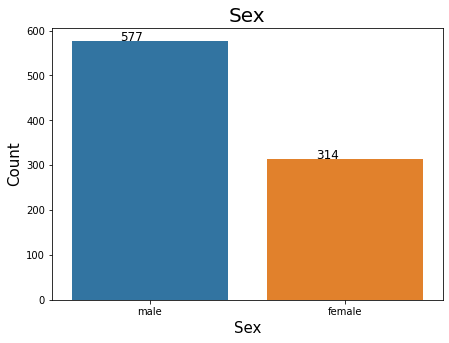

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


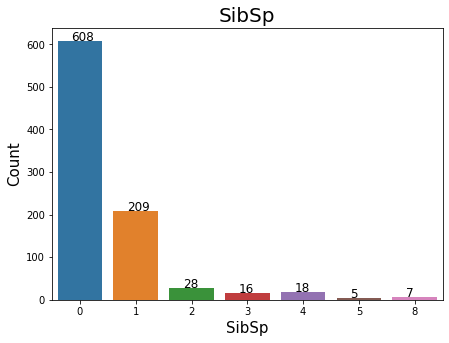

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


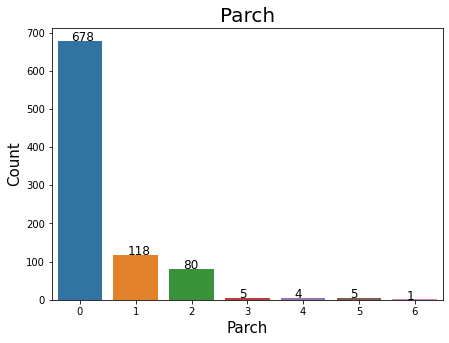

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


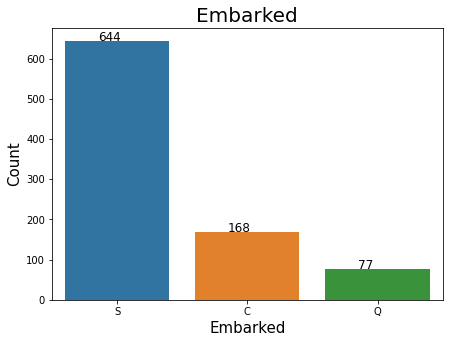

In [12]:
for i in df_cat.columns:
    plt.figure(figsize=(7,5))
    ax = sns.countplot(df_cat[i])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0), fontsize = 12)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

## Di bawah ini adalah perbandingan setiap parameter berdasarkan survivalnya

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


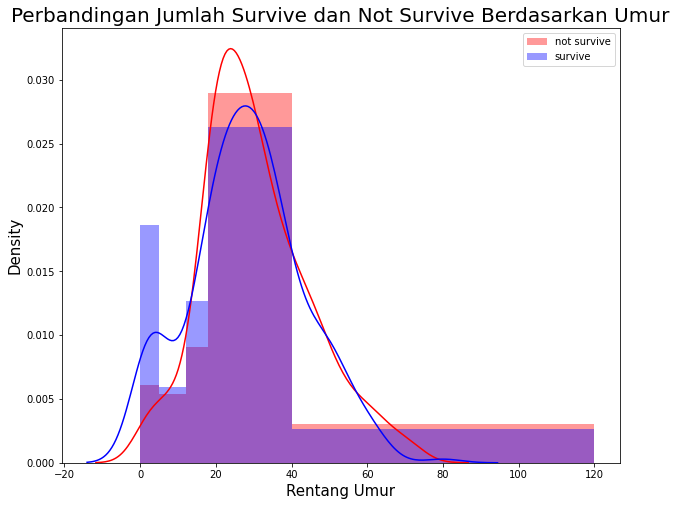

In [13]:
plt.figure(figsize = (10,8))
sns.distplot(train.Age[train.Survived == 0], bins = [0 , 5, 12, 18, 40, 120],color= 'r', label = 'not survive')
sns.distplot(train.Age[train.Survived == 1], bins = [0 , 5, 12, 18, 40, 120],color= 'b', label = 'survive')
plt.title('Perbandingan Jumlah Survive dan Not Survive Berdasarkan Umur', fontsize = 20)
plt.ylabel('Density',fontsize = 15)
plt.xlabel('Rentang Umur',fontsize = 15)
plt.legend()
plt.show()

Pada grafik rentang umur, penumpang yang berumur sekitar balita lebih banyak yang survive daripada yang tidak survive. Hal itu juga terjadi pada penumpang berumur sekitar dibawah 20 tahun. Pada rentang waktu 20 sampai 40 tahun lebih banyak penumpang yang tidak survive daripada penumpang yang survive

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


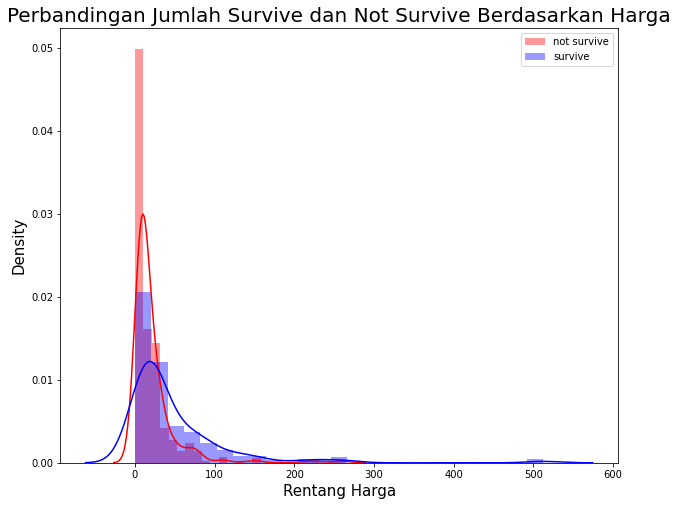

In [14]:
plt.figure(figsize = (10,8))
sns.distplot(train.Fare[train.Survived == 0], bins =25,color= 'r', label = 'not survive')
sns.distplot(train.Fare[train.Survived == 1], bins =25,color= 'b', label = 'survive')
plt.title('Perbandingan Jumlah Survive dan Not Survive Berdasarkan Harga', fontsize = 20)
plt.ylabel('Density',fontsize = 15)
plt.xlabel('Rentang Harga',fontsize = 15)
plt.legend()
plt.show()

Berdasarkan grafik, penumpang dengan harga paling murah lebih banyak yang tidak survive dengan perbandingan yang cukup jauh dibandingkan dengan yang survive. Sedangkan untuk harga yang lebih mahal jumlah penumpang yang survive cenderung lebih banyak daripada yang tidak survive. Diperkirakan penumpang dengan harga murah mendapatkan kesempatan untuk survive lebig kecil dibandingkan dengan penumpang dengan harga lebih mahal

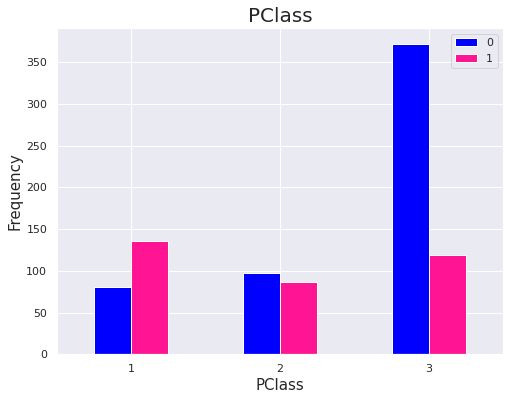

In [15]:
sns.set()
pd.crosstab(train.Pclass , train.Survived).plot(kind = 'bar', figsize = (8,6), color=['blue','deeppink'])
plt.title('PClass', fontsize = 20)
plt.xlabel('PClass', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Pada grafik PClass, penumpang dengan kelas pertama lebih banyak yang survive daripada yang tidak survive. Untuk kelas tiket menengah, jumlah penumpang survive dan tidak survive hampir sama. Pada penumpang tiket kelas ketiga, jumlah penumpang yang tidak survive jauh lebih banyak daripada yang survive. Diperkirakan penumpang dengan tiket kelas pertama mendapatkan kesempatan untuk survive lebig besar dibandingkan dengan penumpang dengan tiket kelas ketiga

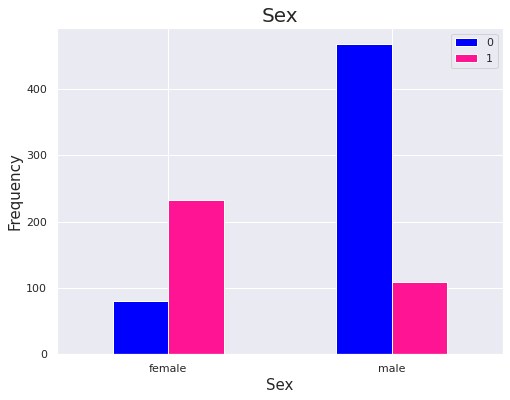

In [16]:
sns.set()
pd.crosstab(train.Sex , train.Survived).plot(kind = 'bar', figsize = (8,6), color=['blue','deeppink'])
plt.title('Sex', fontsize = 20)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Untuk grafik sex, penumpang perempuan lebih banyak yang survive sedangkan penumpang laki-laki lebih banyak yang tidak survive

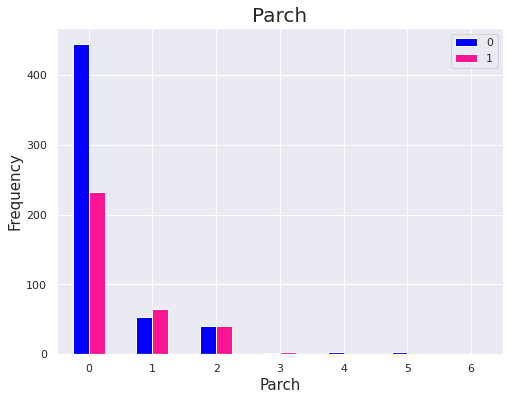

In [17]:
sns.set()
pd.crosstab(train.Parch , train.Survived).plot(kind = 'bar', figsize = (8,6), color=['blue','deeppink'])
plt.title('Parch', fontsize = 20)
plt.xlabel('Parch', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Untuk data Parch atau anggota keluarga, penumpang yang tidak membawa anggota keluarga lebih banyak yang tidak survive daripada penumpang yang survive. Sedangkan penumpang yang membawa 1 anggota keluarga sedikit lebih banyak yang survive daripada yang tidak survive

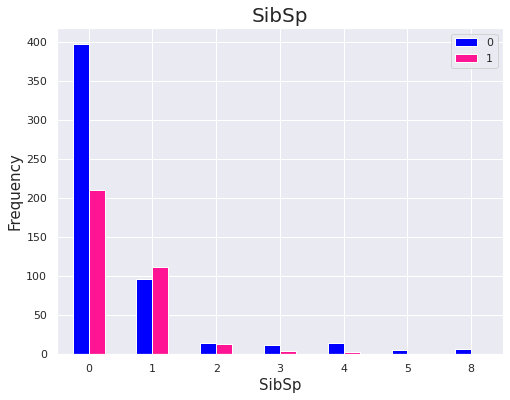

In [18]:
sns.set()
pd.crosstab(train.SibSp , train.Survived).plot(kind = 'bar', figsize = (8,6), color=['blue','deeppink'])
plt.title('SibSp', fontsize = 20)
plt.xlabel('SibSp', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Penumpang yang tidak membawa saudara atau suami/istri lebih banyak yang tidak survive daripada yang membawa 1 saudara atau suami/istri

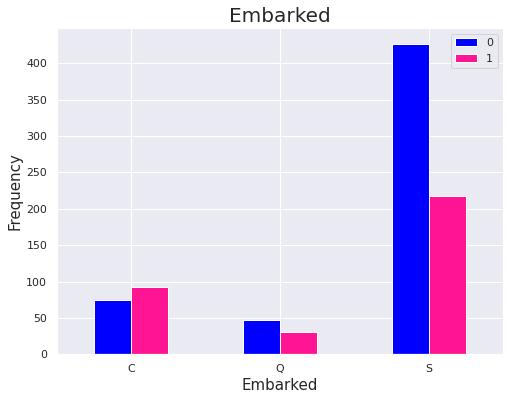

In [19]:
sns.set()
pd.crosstab(train.Embarked , train.Survived).plot(kind = 'bar', figsize = (8,6), color=['blue','deeppink'])
plt.title('Embarked', fontsize = 20)
plt.xlabel('Embarked', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Untuk grafik Embarked atau kota keberangkatan, penumpang yang lebih banyak survive adalah penumpang dengan kota keberangkatan Cherborg. Sedangkan untuk kota Queenstown dan Southampton lebih banyak yang tidak survive

# Preprocessing

kolom Ticket dan Cabin kita drop dengan alasan:

1. Kolom ticket berisi data campuran antara angka dan huruf yang sulit siseteksi

2. Pada kolom Cabin terlalu banyak missing value

In [20]:
train = train.drop(['Ticket','Cabin'], axis = 1)
test = test.drop(['Ticket','Cabin'], axis = 1)

In [21]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [22]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

Pada dataset train kolom Embarked, kita isi missing value dengan data terbanyak atau modus

In [23]:
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [24]:
train['Embarked'].fillna(mode, inplace=True)

Sedangkan pada kolom Fare dataset test kita isi missing value dengan nilai mediannya

In [25]:
median = test['Fare'].dropna().median()
median

14.4542

In [26]:
test['Fare'].fillna(median,inplace=True)

Kita gabungkan dataset train dan test menjadi dataset combine

In [27]:
combine = pd.concat([train, test], axis = 0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Selanjutnya kita hapus kolom nama

In [28]:
combine = combine.drop('Name',axis = 1)

In [29]:
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Kita ganti data ordinal pada kolom Sex dan Embarked menjadi data rasio berbentik integer

In [30]:
combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})
combine['Embarked'] = combine['Embarked'].map({'C':0, 'Q':1, 'S':2})

Kita juga isi missing value pada kolom age dengan nilai rata-ratanya, lalu kita ubah bentuknya menjadi data integer dari data float

In [31]:
mean = combine['Age'].mean()
combine['Age'] = combine['Age'].replace(np.nan, mean)
combine['Age'] = combine['Age'].astype('int')

Kita kembalikan data menjadi data test dan data train

In [32]:
train = combine[:len(train)]
test = combine[len(train):]

Lalu pada dataset train kita drop kolom PassengerId dan pada dataset test kita drop kolom Survived sebagai target

In [33]:
train = train.drop('PassengerId', axis = 1)

In [34]:
test = test.drop('Survived', axis = 1)

# Modelling

Jumlah data test dan data train sama dengan jumlah data awal. Untuk proses modelling dilakukan dengan 6 model yaitu Logistric Regression, Support Vector Machines (SVC), K Nearest Neighbors, Naive Bayes, Decision Tree dan Random Forest

In [35]:
x_train = train.drop('Survived',axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId',axis=1).copy()
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape :  (891, 7)
y_train shape :  (891,)
x_test shape :  (418, 7)


In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
lr_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train)*100,2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


80.13

In [37]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train)*100,2)
acc_svc

68.35

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = svc.predict(x_test)
acc_knn = round(knn.score(x_train, y_train)*100,2)
acc_knn

81.26

In [39]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
acc_nb = round(nb.score(x_train, y_train)*100,2)
acc_nb

79.24

In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred = svc.predict(x_test)
acc_dtree = round(dtree.score(x_train, y_train)*100,2)
acc_dtree

97.64

In [41]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(x_train, y_train)
rforest_pred = svc.predict(x_test)
acc_rforest = round(rforest.score(x_train, y_train)*100,2)
acc_rforest

97.64

In [42]:
print('Model accuracy Logistic Regression    : ' , acc_log)
print('Model accuracy Support Vector Machines: ', acc_svc)
print('Model accuracy KNN                    : ' , acc_knn)
print('Model accuracy Naive Bayes            : ' , acc_nb)
print('Model accuracy Decision Tree          : ' , acc_dtree)
print('Model accuracy Random Forest          : ' , acc_rforest)

Model accuracy Logistic Regression    :  80.13
Model accuracy Support Vector Machines:  68.35
Model accuracy KNN                    :  81.26
Model accuracy Naive Bayes            :  79.24
Model accuracy Decision Tree          :  97.64
Model accuracy Random Forest          :  97.64


dari ke-6 Model, model yang memberikan akurasi paling tinggi yaitu model Decision tree dan model Random forest yaitu 97,64%. Sedangkan model yang memberikan akurasi terkecil yaitu model SVC sebesar 68,35%

## Selanjutnya dilakukan proses cross validation. Hal ini berfungsi untuk lebih menguji model dengan data acak yang berbeda

In [43]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

In [44]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [45]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [46]:
cv_res = pd.DataFrame({'Cross Validation Mean' : cv_mean, 'Cross Validation Std' : cv_std, 'Model':['Logistic Regression','Support Vector Machines','K Nearest Neighbors','Naive Bayes','Decision Tree','Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)

,Cross Validation Mean,Cross Validation Std,Model
5,0.809288,0.041790,Random Forest
0,0.796879,0.023596,Logistic Regression
3,0.786792,0.023725,Naive Bayes
4,0.782285,0.035121,Decision Tree
2,0.703783,0.042590,K Nearest Neighbors
1,0.680200,0.043585,Support Vector Machines


Setelah proses cross validation, model yang memberikan hasil terbaik yaitu model Random Forest dengan nilai sekitar 0,80 atau 80%. Dan model yang memberikan hasil terkecil yaitu SVC dengan nilai 0,68 atau sekitar 68%

In [47]:
rforest_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

Karena model Random Forest memberikan nilai akurasi tertinggi, maka kita jadikan model Random Forest untuk dijadikan data y_test

In [48]:
test['hasil'] = rforest_pred
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasil
891,892,3,0,34,0,0,7.8292,1,0.0
892,893,3,1,47,1,0,7.0000,2,0.0
893,894,2,0,62,0,0,9.6875,1,0.0
894,895,3,0,27,0,0,8.6625,2,0.0
895,896,3,1,22,1,1,12.2875,2,0.0


Berikut adalah ciri-ciri beberapa orang yang diprediksi selamat berdasarkan model random forest

In [49]:
selamat = test.loc[test['hasil']==1.0]
selamat

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasil
903,904,1,1,23,1,0,82.2667,2,1.0
905,906,1,1,47,1,0,61.1750,2,1.0
911,912,1,0,55,1,0,59.4000,0,1.0
914,915,1,0,21,0,1,61.3792,0,1.0
915,916,1,1,48,1,3,262.3750,0,1.0
...,...,...,...,...,...,...,...,...,...
1291,1292,1,1,30,0,0,164.8667,2,1.0
1293,1294,1,1,22,0,1,59.4000,0,1.0
1298,1299,1,0,50,1,1,211.5000,0,1.0
1302,1303,1,1,37,1,0,90.0000,1,1.0


In [54]:
jumlah_test = len(test.index)

In [56]:
jumlah_selamat = len(selamat.index)

In [52]:
persentase = (jumlah_selamat/jumlah_test)*100
print('Persentase jumlah penumpang yang selamat dari prediksi yaitu = {:.2f} %'.format(persentase))

Persentase jumlah penumpang yang selamat dari prediksi yaitu = 18.18 %


In [65]:
col = selamat[['Pclass','Sex','SibSp','Parch','Embarked']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


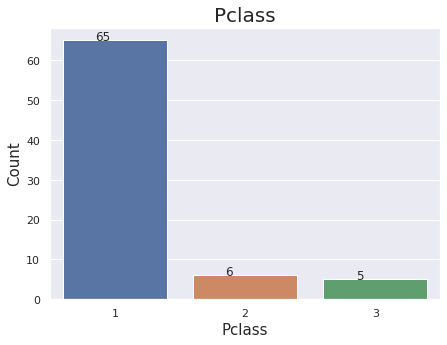

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


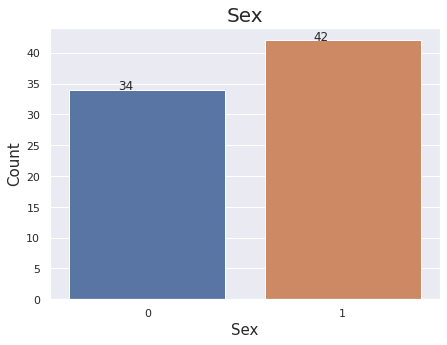

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


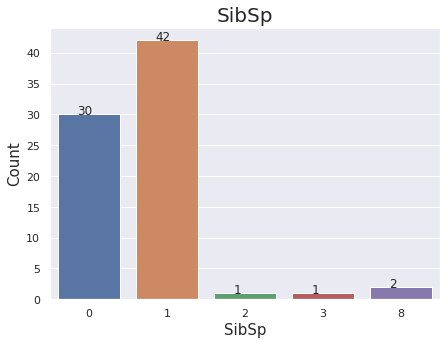

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


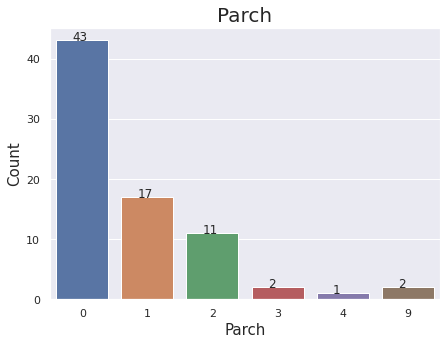

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


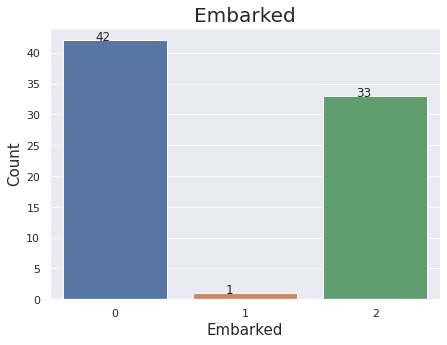

In [67]:
for i in col.columns:
    plt.figure(figsize=(7,5))
    ax = sns.countplot(col[i])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0), fontsize = 12)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

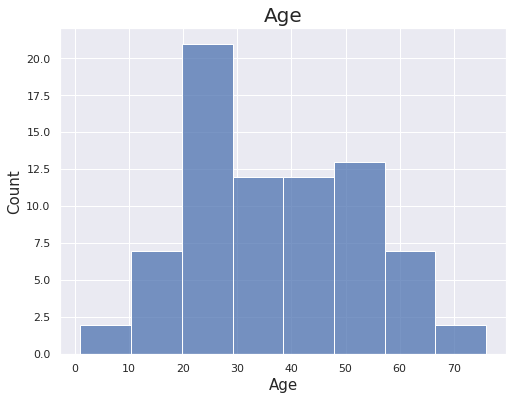

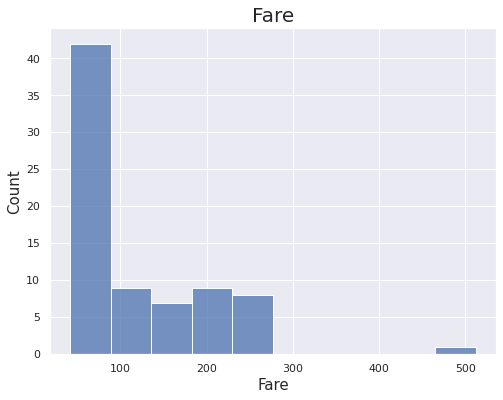

In [68]:
num = selamat[['Age','Fare']]

for i in num.columns:
    plt.figure(figsize = (8,6))
    sns.histplot(num[i])
    plt.title(i)
    plt.title((i), fontsize = 20)
    plt.ylabel('Count',fontsize = 15)
    plt.xlabel((i),fontsize = 15)
    plt.show()

## Berdasarkan graik hasil prediksi penummpang yang selamat, kebanyakan penumpang selamat dari golongan Pclass 1 atau pertama, berjenis kelamin perempuan, membawa 1 saudara atau suami/istri, tidak membawa orangtua atau anak, berangkat dari kota Cherborg, berumur 20 sampai 30 tahun dan harga tiket dibawah 100